In [3]:
# Import libraries
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import pyxlsb
import re

In [4]:
#Arranging paths

if Path.cwd().name == '_notebooks':
    os.chdir('..')  # Go to project root
elif not (Path.cwd() / '__notebooks').exists():
    # Find and change to project root
    for parent in Path.cwd().parents:
        if (parent / 'notebooks').exists():
            os.chdir(parent)
            break

print(f"Working directory set to: {Path.cwd()}")

Working directory set to: /Users/allegratuvida/Desktop/escritorio/data_critica_2025/Proyectos en desarrollo/Lighthouse_ICE/lighthouse_ice


In [5]:
# Ingest xlsx files



df_arrests = pd.read_excel('data/raw/ice_release_jul2025/2025-ICLI-00019_2024-ICFO-39357_ERO Admin Arrests.xlsx', skiprows=6)

df_arrests



,Apprehension Date,Apprehension State,Apprehension County,Apprehension AOR,Final Program,Final Program Group,Apprehension Method,Apprehension Criminality,Case Status,Case Category,...,Final Order Date,Birth Date,Birth Year,Citizenship Country,Gender,Apprehension Site Landmark,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier
0,2024-08-07 09:43:00,VIRGINIA,NaN,Washington Area of Responsibility,ERO Criminal Alien Program,ICE,Non-Custodial Arrest,1 Convicted Criminal,8-Excluded/Removed - Inadmissibility,[16] Reinstated Final Order,...,1999-10-18,"(b)(6), (b)(7)(C)",1981,HONDURAS,Male,"HBG GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000b34edd657d516c02b13a7c352d62d0effcb6
1,2024-10-19 20:33:00,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,1 Convicted Criminal,6-Deported/Removed - Deportability,[16] Reinstated Final Order,...,2023-10-10,"(b)(6), (b)(7)(C)",1984,MEXICO,Male,"HARRIS COUNTY JAIL, HOUSTON, TX","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000ba6e459998a6046d185d82cf4349de1479d0
2,2025-04-15 10:08:21,NEW JERSEY,NaN,Newark Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,1 Convicted Criminal,8-Excluded/Removed - Inadmissibility,[16] Reinstated Final Order,...,2025-04-15,"(b)(6), (b)(7)(C)",1988,DOMINICAN REPUBLIC,Male,"FORT DIX EAST, NEW JERSEY","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000c3d23fb0e444864559575900d410c4e8490f
3,2025-06-03 09:20:00,MINNESOTA,NaN,St. Paul Area of Responsibility,Fugitive Operations,ICE,Non-Custodial Arrest,3 Other Immigration Violator,ACTIVE,[8G] Expedited Removal - Credible Fear Referral,...,2025-06-03,"(b)(6), (b)(7)(C)",1985,COLOMBIA,Female,"SPM GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000d3dbf8033b5f209f6547ffee5b84feb4f599
4,2025-01-21 17:41:00,NaN,NaN,Miami Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,2 Pending Criminal Charges,3-Voluntary Departure Confirmed,[8C] Excludable / Inadmissible - Administrativ...,...,2025-02-01,"(b)(6), (b)(7)(C)",1983,MEXICO,Male,MIAMI DADE COUNTY JAIL TURNER GUILFORD KNIGHT ...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",000104d730bf021326c6dc0deb3dd575304136b5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265221,2025-06-26 15:39:16,CALIFORNIA,NaN,Los Angeles Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,3 Other Immigration Violator,ACTIVE,[8A] Excludable / Inadmissible - Hearing Not C...,...,NaT,"(b)(6), (b)(7)(C)",1985,MEXICO,Male,"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN
265222,2025-06-26 16:20:16,CALIFORNIA,NaN,Los Angeles Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,3 Other Immigration Violator,NaN,NaN,...,NaT,"(b)(6), (b)(7)(C)",1971,MEXICO,Male,"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN
265223,2025-06-26 21:40:19,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,3 Other Immigration Violator,NaN,NaN,...,NaT,"(b)(6), (b)(7)(C)",1976,EL SALVADOR,Male,"HARRIS COUNTY JAIL, HOUSTON, TX",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN
265224,2025-06-26 21:20:07,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,2 Pending Criminal Charges,NaN,NaN,...,NaT,"(b)(6), (b)(7)(C)",1984,MEXICO,Male,"HARRIS COUNTY JAIL, HOUSTON, TX",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN


In [6]:
# List the column names
print("Column names:", df_arrests.columns.tolist())

# Show a statistical summary for each column
df_arrests.describe(include='all')



Column names: ['Apprehension Date', 'Apprehension State', 'Apprehension County', 'Apprehension AOR', 'Final Program', 'Final Program Group', 'Apprehension Method', 'Apprehension Criminality', 'Case Status', 'Case Category', 'Departed Date', 'Departure Country', 'Final Order Yes No', 'Final Order Date', 'Birth Date', 'Birth Year', 'Citizenship Country', 'Gender', 'Apprehension Site Landmark', 'Alien File Number', 'EID Case ID', 'EID Subject ID', 'Unique Identifier']


,Apprehension Date,Apprehension State,Apprehension County,Apprehension AOR,Final Program,Final Program Group,Apprehension Method,Apprehension Criminality,Case Status,Case Category,...,Final Order Date,Birth Date,Birth Year,Citizenship Country,Gender,Apprehension Site Landmark,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier
count,265226,208983,0.0,259323,265226,265226,265226,265226,261328,261328,...,160289,265226,265226.000000,265226,265226,259126,263203,261328,265226,263203
unique,NaN,61,NaN,26,14,1,25,3,13,29,...,NaN,1,NaN,194,3,4968,1,1,1,249872
top,NaN,TEXAS,NaN,Miami Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,1 Convicted Criminal,ACTIVE,[8C] Excludable / Inadmissible - Administrativ...,...,NaN,"(b)(6), (b)(7)(C)",NaN,MEXICO,Male,DALLAS COUNTY GENERAL AREA,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",1e2ec1831c1fd33fdb93b412699a798db3544957
freq,NaN,52778,NaN,26925,162433,265226,112103,123124,111110,76599,...,NaN,265226,NaN,101036,230238,11105,263203,261328,265226,7
mean,2024-09-27 10:56:18.055142144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-01-25 01:16:33.043814656,NaN,1989.950356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2023-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1967-01-06 00:00:00,NaN,1934.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-03-29 06:39:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-29 00:00:00,NaN,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-11-04 07:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2024-03-25 00:00:00,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2025-04-03 08:49:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-01-23 00:00:00,NaN,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2025-06-27 09:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-06-26 00:00:00,NaN,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Show the data type of each column
print("\nData types for each column:")
print(df_arrests.dtypes)


Data types for each column:
Apprehension Date             datetime64[ns]
Apprehension State                    object
Apprehension County                  float64
Apprehension AOR                      object
Final Program                         object
Final Program Group                   object
Apprehension Method                   object
Apprehension Criminality              object
Case Status                           object
Case Category                         object
Departed Date                 datetime64[ns]
Departure Country                     object
Final Order Yes No                    object
Final Order Date              datetime64[ns]
Birth Date                            object
Birth Year                             int64
Citizenship Country                   object
Gender                                object
Apprehension Site Landmark            object
Alien File Number                     object
EID Case ID                           object
EID Subject ID            

## Task 1. Making sense of arrests data

In [8]:
#Making sure data is clean, frequency table for each column in df_arrests

# Create a frequency table for each column in df_arrests, including counts and percentages, and save to CSV

freq_tables = []

for col in df_arrests.columns:
    counts = df_arrests[col].value_counts(dropna=False)
    percentages = df_arrests[col].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({
        'column': col,
        'value': counts.index,
        'count': counts.values,
        'percentage': percentages.values
    })
    freq_tables.append(freq_df)

# Concatenate all frequency tables into one DataFrame
all_freq_df = pd.concat(freq_tables, ignore_index=True)

# Save to CSV
all_freq_df.to_csv('outputs/arrests_frequency_tables.csv', index=False)

# Display the first few rows
all_freq_df.head()
    

,column,value,count,percentage
0,Apprehension Date,2025-01-28 12:15:33,24,0.009049
1,Apprehension Date,2023-12-23 14:01:00,22,0.008295
2,Apprehension Date,2023-09-26 00:00:00,20,0.007541
3,Apprehension Date,2024-02-08 08:00:00,20,0.007541
4,Apprehension Date,2023-10-04 15:57:26,20,0.007541


In [9]:
# Writing a function in case this task is needed for other dataframes

def save_frequency_tables(df, csv_path):
    """
    Creates a frequency table for each column in the DataFrame, including counts and percentages,
    concatenates them, and saves to a CSV file.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        csv_path (str): The path to save the resulting CSV file.
    """
    freq_tables = []
    for col in df.columns:
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100
        freq_df = pd.DataFrame({
            'column': col,
            'value': counts.index,
            'count': counts.values,
            'percentage': percentages.values
        })
        freq_tables.append(freq_df)
    all_freq_df = pd.concat(freq_tables, ignore_index=True)
    all_freq_df.to_csv(csv_path, index=False)
    return all_freq_df

# Example usage:
# freq_df = save_frequency_tables(df_arrests, 'outputs/tables/arrests_frequency_tables.csv')

In [10]:


# Ensure "Apprehension Date" is datetime
df_arrests["Apprehension Date"] = pd.to_datetime(df_arrests["Apprehension Date"], errors="coerce")

# Define date range: two days before and after 2025-03-08
start_date = pd.Timestamp("2025-03-06")
end_date = pd.Timestamp("2025-03-09")

# Filter by date
date_mask = (df_arrests["Apprehension Date"] >= start_date) & (df_arrests["Apprehension Date"] <= end_date)

# Filter by year of birth

birth_mask = df_arrests["Birth Year"].between(1994, 1996)

# Filter by "New York" in the appropriate column 
# Replace 'Field Office' with the actual column name if different
location_mask = df_arrests["Apprehension AOR"] == "New York City Area of Responsibility"

# Filter by "Located" OR "Non-custodial Arrest" in "Aprehension method" column
method_mask = df_arrests["Apprehension Method"].isin(["Located", "Non-custodial Arrest"])

# Combine all filters
filtered_df = df_arrests[date_mask & location_mask & method_mask]

filtered_df

,Apprehension Date,Apprehension State,Apprehension County,Apprehension AOR,Final Program,Final Program Group,Apprehension Method,Apprehension Criminality,Case Status,Case Category,...,Final Order Date,Birth Date,Birth Year,Citizenship Country,Gender,Apprehension Site Landmark,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier
76837,2025-03-06 10:11:24,NEW YORK,NaN,New York City Area of Responsibility,Fugitive Operations,ICE,Located,1 Convicted Criminal,NaN,NaN,...,NaT,"(b)(6), (b)(7)(C)",1992,GUATEMALA,Male,"NBG GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)",NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",4ae483540ece13812b45b53d511a3d3808f49334
89241,2025-03-06 18:48:20,NEW YORK,NaN,New York City Area of Responsibility,Fugitive Operations,ICE,Located,1 Convicted Criminal,ACTIVE,[16] Reinstated Final Order,...,NaT,"(b)(6), (b)(7)(C)",1981,EL SALVADOR,Male,"NBG GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",56e13263d5ed401151ee2e6e7f5a6b1f108f9173
178822,2025-03-08 00:23:00,NEW YORK,NaN,New York City Area of Responsibility,Fugitive Operations,ICE,Located,2 Pending Criminal Charges,ACTIVE,[8C] Excludable / Inadmissible - Administrativ...,...,2025-06-18,"(b)(6), (b)(7)(C)",1995,EL SALVADOR,Male,"CIP GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",ade850bf8663108893d7a1c173caeb57c157a981
183733,2025-03-06 12:22:00,NEW YORK,NaN,New York City Area of Responsibility,Non-Detained Docket Control,ICE,Located,1 Convicted Criminal,8-Excluded/Removed - Inadmissibility,[8C] Excludable / Inadmissible - Administrativ...,...,2021-02-10,"(b)(6), (b)(7)(C)",1986,MEXICO,Unknown,"NDD - 26 FEDERAL PLAZA NY, NY","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",b2aff09eabbfc2ec5a1622b84e5e8071cd986dfd


In [11]:
# Save to CSV
filtered_df.to_csv('outputs/tables/arrests_filtered_table.csv', index=False)

# Display the first few rows
all_freq_df.head()

,column,value,count,percentage
0,Apprehension Date,2025-01-28 12:15:33,24,0.009049
1,Apprehension Date,2023-12-23 14:01:00,22,0.008295
2,Apprehension Date,2023-09-26 00:00:00,20,0.007541
3,Apprehension Date,2024-02-08 08:00:00,20,0.007541
4,Apprehension Date,2023-10-04 15:57:26,20,0.007541


## Task 2 finding jails or prisons individuales have been taken to and adding a County column

In [12]:
###Cleaning "Apprehension Site Landmark" column

# Function to strip whitespaces and check for inconsistent casing

def clean_and_check_column(df, col_name):
    """
    Cleans the specified column in the DataFrame by stripping leading/trailing spaces,
    checks for inconsistent casing of 'county', and prints a summary of inconsistencies.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        col_name (str): The name of the column to clean and check.
    """
    # Strip leading/trailing spaces
    df[col_name] = df[col_name].astype(str).str.strip()
    
    # Check for inconsistent casing
    has_upper = df[col_name].str.contains("COUNTY")
    has_lower = df[col_name].str.contains("county")
    count_upper = has_upper.sum()
    count_lower = has_lower.sum()
    
    if count_upper > 0 and count_lower > 0:
        print(f"Inconsistency found: {count_upper} rows use 'COUNTY', {count_lower} rows use 'county'.")
    elif count_upper > 0:
        print("All rows use 'COUNTY' (uppercase).")
    elif count_lower > 0:
        print("All rows use 'county' (lowercase).")
    else:
        print("No rows contain the word 'county' or 'COUNTY'.")
    
    # Check for leading/trailing spaces
    leading_spaces = df[col_name].str.match(r"^\s+").sum()
    trailing_spaces = df[col_name].str.match(r".*\s+$").sum()
    if leading_spaces > 0 or trailing_spaces > 0:
        print(f"Found {leading_spaces} rows with leading spaces and {trailing_spaces} rows with trailing spaces.")
    else:
        print("No leading or trailing spaces found.")



In [13]:
# Applying function to the "Apprehension Site Landmark" column

clean_and_check_column(df_arrests, "Apprehension Site Landmark")

All rows use 'COUNTY' (uppercase).
No leading or trailing spaces found.


In [14]:
# Understanding the structure of strings, possible number of words before "COUNTY" (I'll make it case insensitive anyways)

def words_before_county(text):
    """
    Returns the number of words before the word 'county' (case-insensitive) in a string.
    Returns None if 'county' is not found.
    """
    if not isinstance(text, str):
        return None
    match = re.search(r'\b(\w+(?:\s+\w+)*)\s+county\b', text, re.IGNORECASE)
    if match:
        before = match.group(1)
        return len(before.split())
    return None

In [15]:
# Apply to the column and get the range
word_counts = df_arrests["Apprehension Site Landmark"].dropna().apply(words_before_county)
print("Range of number of words before 'county':", word_counts.min(), "to", word_counts.max())

Range of number of words before 'county': 1.0 to 6.0


In [16]:
# Understand what is the patter in string with more than three words before "COUNTY"

# Function to count words before 'county'
def words_before_county(text):
    """
    Returns the number of words before the word 'county' (case-insensitive) in a string.
    Returns None if 'county' is not found.
    """
    if not isinstance(text, str):
        return None
    match = re.search(r'\b(\w+(?:\s+\w+)*)\s+county\b', text, re.IGNORECASE)
    if match:
        before = match.group(1)
        return len(before.split())
    return None

# Apply function and filter rows with more than 3 words before 'county'
df_arrests['words_before_county'] = df_arrests["Apprehension Site Landmark"].apply(words_before_county)
result = df_arrests[df_arrests['words_before_county'] > 2]

# Display the filtered table
result[["Apprehension Site Landmark", "words_before_county"]]

,Apprehension Site Landmark,words_before_county
1945,"FUGITIVE OPERATIONS ON STREET MADISON COUNTY, ...",5.0
2948,Fugitive Operations Cumberland County,3.0
3182,North Santa Barbara County Jail,3.0
3369,"FUGITIVE OPERATIONS ON STREET SCHUYLER COUNTY,...",5.0
3932,"FUGITIVE OPERATIONS ON STREET ST LOUIS COUNTY,...",6.0
...,...,...
259141,ORL - VOLUSIA COUNTY JAIL FLORIDA COUNTY JAIL,4.0
260224,CAP SANTA CRUZ COUNTY JAIL AZ STATE,3.0
260524,ORL - VOLUSIA COUNTY JAIL FLORIDA COUNTY JAIL,4.0
261940,"FUGITIVE OPERATIONS ON STREET ST CLAIR COUNTY,...",6.0


In [17]:
def extract_cleaned_phrases(text, basis_word="county"):
    """
    For each instance of the basis_word (e.g., 'county'), remove unwanted phrases/patterns before it,
    and extract the cleaned phrase before and including the basis_word.
    Returns a single string with all such cleaned phrases joined by '; ', or None if nothing found.
    """
    if not isinstance(text, str):
        return None

    unwanted_phrases = [
        r"fugitive operations",
        r"fugitive operations on street",
        r"at large arrest",
        r"all areas inside",
        r"cap",
        r"\b[a-zA-Z]{1,3}\s-\s"
    ]
    unwanted_pattern = re.compile("|".join(unwanted_phrases), re.IGNORECASE)

    results = []
    for match in re.finditer(rf"(.*?\b{basis_word}\b)", text, re.IGNORECASE):
        phrase = match.group(1)
        cleaned = unwanted_pattern.sub("", phrase)
        cleaned = cleaned.strip()
        if cleaned:
            results.append(cleaned)
    if not results:
        return None
    return "; ".join(results)




In [18]:
# Apply function to word "county"

df_arrests["county_name"] = df_arrests["Apprehension Site Landmark"].apply(
    lambda x: extract_cleaned_phrases(x, basis_word="county")
    )

In [19]:
import numpy as np

df_arrests["county_name"] = (
    df_arrests["county_name"]
    .where(df_arrests["county_name"].notna(), np.nan)  # keep NaN
    .astype(str)
    .str.strip()
    .str.replace(r"^\s*-\s*", "", regex=True)  # removes any leading dash with optional spaces
    .str.upper()
    .replace("NAN", np.nan)  # convert string "NAN" back to np.nan
)

For the facilities, I included in my function a way to detect the most commons facility patterns: the words "center", "correctional", "penitentiary", "removal", "office", "department" as the end words of such terms as "service processing center", for instance and that may relate to collaboration with local enforcement authorities (LEA). This approach is still incomplete, as it only renders 32% of the total values of the arrest. 


In [20]:
# Create function to extract patterns related to jails, prisons, correcitionals and other facilities

def extract_cleaned_phrases_multiple(text, basis_words=None):
    """
    For each instance of any word in basis_words (e.g., ['county', 'jail', 'center', ...]), 
    remove unwanted phrases/patterns before it, and extract the cleaned phrase before and including the basis word.
    Returns a single string with all such cleaned phrases joined by '; ', or None if nothing found.
    """
    if not isinstance(text, str) or not basis_words:
        return None

    # Unwanted phrases/patterns (case-insensitive)
    unwanted_phrases = [
        r"fugitive operations",
        r"fugitive operations on street",
        r"at large arrest",
        r"all areas inside",
        r"cap",
        r"\b[a-zA-Z]{1,3}\s-\s"
    ]
    unwanted_pattern = re.compile("|".join(unwanted_phrases), re.IGNORECASE)

    results = []
    for basis_word in basis_words:
        # Regex to find all phrases ending with the basis_word (case-insensitive)
        for match in re.finditer(rf"(.*?\b{basis_word}\b)", text, re.IGNORECASE):
            phrase = match.group(1)
            cleaned = unwanted_pattern.sub("", phrase)
            cleaned = cleaned.strip()
            if cleaned:
                results.append(cleaned)
    if not results:
        return None
    return "; ".join(results)

In [21]:
df_arrests["facility_name"] = df_arrests["Apprehension Site Landmark"].apply(
    lambda x: extract_cleaned_phrases_multiple(x, basis_words=["jail", "center","office", "department", "prison", "correctional", "penitentiary", "removal"])
    )

df_arrests

,Apprehension Date,Apprehension State,Apprehension County,Apprehension AOR,Final Program,Final Program Group,Apprehension Method,Apprehension Criminality,Case Status,Case Category,...,Citizenship Country,Gender,Apprehension Site Landmark,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier,words_before_county,county_name,facility_name
0,2024-08-07 09:43:00,VIRGINIA,NaN,Washington Area of Responsibility,ERO Criminal Alien Program,ICE,Non-Custodial Arrest,1 Convicted Criminal,8-Excluded/Removed - Inadmissibility,[16] Reinstated Final Order,...,HONDURAS,Male,"HBG GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000b34edd657d516c02b13a7c352d62d0effcb6,NaN,NaN,None
1,2024-10-19 20:33:00,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,1 Convicted Criminal,6-Deported/Removed - Deportability,[16] Reinstated Final Order,...,MEXICO,Male,"HARRIS COUNTY JAIL, HOUSTON, TX","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000ba6e459998a6046d185d82cf4349de1479d0,1.0,HARRIS COUNTY,HARRIS COUNTY JAIL
2,2025-04-15 10:08:21,NEW JERSEY,NaN,Newark Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,1 Convicted Criminal,8-Excluded/Removed - Inadmissibility,[16] Reinstated Final Order,...,DOMINICAN REPUBLIC,Male,"FORT DIX EAST, NEW JERSEY","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000c3d23fb0e444864559575900d410c4e8490f,NaN,NaN,None
3,2025-06-03 09:20:00,MINNESOTA,NaN,St. Paul Area of Responsibility,Fugitive Operations,ICE,Non-Custodial Arrest,3 Other Immigration Violator,ACTIVE,[8G] Expedited Removal - Credible Fear Referral,...,COLOMBIA,Female,"SPM GENERAL AREA, NON-SPECIFIC","(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000d3dbf8033b5f209f6547ffee5b84feb4f599,NaN,NaN,None
4,2025-01-21 17:41:00,NaN,NaN,Miami Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,2 Pending Criminal Charges,3-Voluntary Departure Confirmed,[8C] Excludable / Inadmissible - Administrativ...,...,MEXICO,Male,MIAMI DADE COUNTY JAIL TURNER GUILFORD KNIGHT ...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",000104d730bf021326c6dc0deb3dd575304136b5,2.0,MIAMI DADE COUNTY,MIAMI DADE COUNTY JAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265221,2025-06-26 15:39:16,CALIFORNIA,NaN,Los Angeles Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,3 Other Immigration Violator,ACTIVE,[8A] Excludable / Inadmissible - Hearing Not C...,...,MEXICO,Male,"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN,2.0,LOS ANGELES COUNTY,None
265222,2025-06-26 16:20:16,CALIFORNIA,NaN,Los Angeles Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Federal Incarceration,3 Other Immigration Violator,NaN,NaN,...,MEXICO,Male,"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN,2.0,LOS ANGELES COUNTY,None
265223,2025-06-26 21:40:19,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,3 Other Immigration Violator,NaN,NaN,...,EL SALVADOR,Male,"HARRIS COUNTY JAIL, HOUSTON, TX",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN,1.0,HARRIS COUNTY,HARRIS COUNTY JAIL
265224,2025-06-26 21:20:07,TEXAS,NaN,Houston Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,2 Pending Criminal Charges,NaN,NaN,...,MEXICO,Male,"HARRIS COUNTY JAIL, HOUSTON, TX",NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)",NaN,1.0,HARRIS COUNTY,HARRIS COUNTY JAIL


In [22]:
#Making sure the facility column is clean
df_arrests["facility_name"] = (
    df_arrests["facility_name"]
    .where(df_arrests["facility_name"].notna(), np.nan)  # keep NaN
    .astype(str)
    .str.strip()
    .str.replace(r"^\s*-\s*", "", regex=True)  # removes any leading dash with optional spaces
    .str.upper()
    .replace("NAN", np.nan)  # convert string "NAN" back to np.nan
)

### Task 3 - Drafting questions

A major responsibility of the data team is to both assist reporters by using their ground reporting as a starting point for quantitative analysis as well as to suggest questions and data the reporter may not have thought to ask in order to reveal more systemic patterns beyond anecdotal cases of wrongdoing. 

##Step 1

In the brief, a reporter mentioned that very little is known about the background of people who have been most targeted under the new program and where. They want to figure this out.

Please transform the reporter's editorial goal into a question that can be answered with this data set. 
----
The question to be answered only with the arrests dataset: 

What are the groups most targeted by administrative arrests enforced by ERO in the US, broken down by national background (citizenship country), gender, age group, Apprehension criminality, states* (there is 20% missing data) counties* (data is not complete from this table) and facility (also incomplete data)





## Overall most targeted group by gender and age group

In [23]:
print(df_arrests.columns)

Index(['Apprehension Date', 'Apprehension State', 'Apprehension County',
       'Apprehension AOR', 'Final Program', 'Final Program Group',
       'Apprehension Method', 'Apprehension Criminality', 'Case Status',
       'Case Category', 'Departed Date', 'Departure Country',
       'Final Order Yes No', 'Final Order Date', 'Birth Date', 'Birth Year',
       'Citizenship Country', 'Gender', 'Apprehension Site Landmark',
       'Alien File Number', 'EID Case ID', 'EID Subject ID',
       'Unique Identifier', 'words_before_county', 'county_name',
       'facility_name'],
      dtype='object')


In [24]:
# Pivot table: Gender (absolute numbers and percentages)
pivot_gender = pd.pivot_table(
    df_arrests,
    index="Gender",
    values="Unique Identifier",  # Replace with your unique ID column if needed
    aggfunc="count",
    fill_value=0
)
pivot_gender_percent = (pivot_gender / pivot_gender.sum()) * 100
pivot_gender_combined = pivot_gender.rename(columns={"Unique Identifier": "Count"})
pivot_gender_combined["Percentage"] = pivot_gender_percent["Unique Identifier"]
pivot_gender_combined.to_csv("outputs/tables/pivot_gender_count_percent.csv")
display(pivot_gender_combined)

# Pivot table: Age Group (absolute numbers and percentages)
pivot_age_group = pd.pivot_table(
    df_arrests,
    index="Age Group",
    values="Unique Identifier",  # Replace with your unique ID column if needed
    aggfunc="count",
    fill_value=0
)
pivot_age_group_percent = (pivot_age_group / pivot_age_group.sum()) * 100
pivot_age_group_combined = pivot_age_group.rename(columns={"Unique Identifier": "Count"})
pivot_age_group_combined["Percentage"] = pivot_age_group_percent["Unique Identifier"]
pivot_age_group_combined.to_csv("outputs/tables/pivot_age_group_count_percent.csv")
display(pivot_age_group_combined)

,Count,Percentage
Gender,,
Female,33600,12.765812
Male,228410,86.780926
Unknown,1193,0.453262


KeyError: 'Age Group'

In [ ]:
# Percentage of arrests of males between the most common working age in the USA between 35 and 44 according to 

# Calculate current year and age if not already present
current_year = pd.Timestamp.now().year
if "Age" not in df_arrests.columns:
    df_arrests["Age"] = current_year - df_arrests["Birth Year"]

# Filter for males aged 15-64
mask = (df_arrests["Gender"].str.upper() == "MALE") & (df_arrests["Age"] >= 15) & (df_arrests["Age"] <= 64)
male_15_64_count = df_arrests.loc[mask, "Unique Identifier"].nunique()
total_count = df_arrests["Unique Identifier"].nunique()

percentage = (male_15_64_count / total_count) * 100 if total_count > 0 else 0
print(f"Percentage of unique identifiers for males aged 15-64: {percentage:.2f}%")

Percentage of unique identifiers for males aged 15-64: 84.57%


Most targeted groups are males (86.7 % of total arrests) in working ages, as 84.57% of total arrests among all population of the database are between the working age as defined by OCDE between 15-64 years old, the distribution peaks at 26-30 years for females and at 31-35 fo males as illustrated in the histogram.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


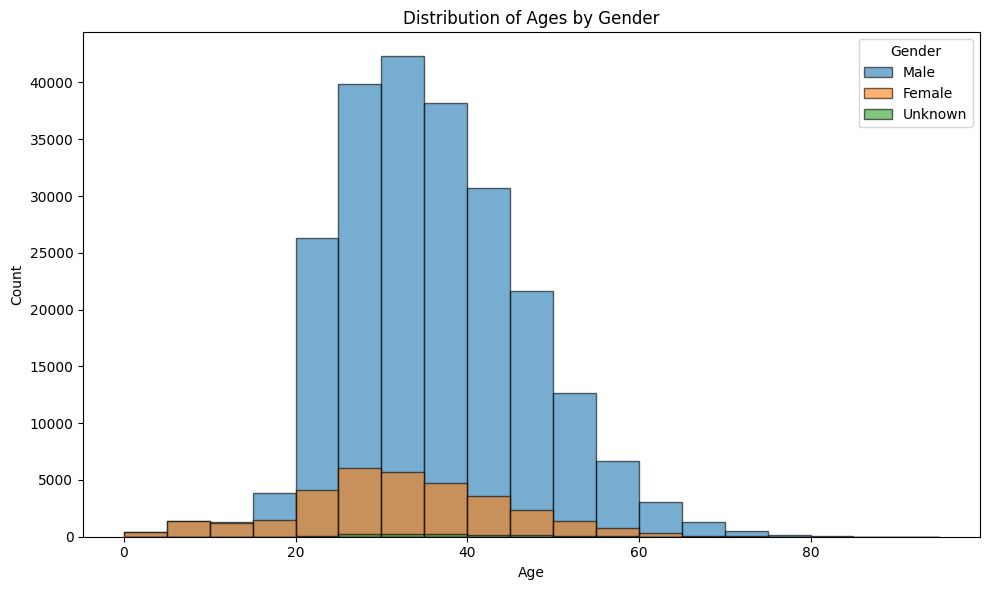

In [ ]:
# Drop rows with missing or invalid ages or genders
df_plot = df_arrests.dropna(subset=["Age", "Gender"])
df_plot = df_plot[df_plot["Age"].apply(lambda x: isinstance(x, (int, float)))]

plt.figure(figsize=(10, 6))
for gender in df_plot["Gender"].dropna().unique():
    plt.hist(
        df_plot[df_plot["Gender"] == gender]["Age"],
        bins=range(0, 100, 5),
        alpha=0.6,
        label=str(gender),
        edgecolor='black'
    )

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Ages by Gender")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("outputs/figures/age_gender_histogram.png")
plt.show()
plt.close()

## Distintictive national background for people identified as males or females



In [ ]:
# Pivot table: Unique Identifier counts by Citizenship Country and Gender (absolute numbers)
pivot_counts = pd.pivot_table(
    df_arrests,
    index="Citizenship Country",
    columns="Gender",
    values="Unique Identifier",
    aggfunc="count",
    fill_value=0
)

# Calculate percentages by row (Citizenship Country)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_percent = pivot_percent.round(2)
pivot_percent.columns = [f"{col} (%)" for col in pivot_percent.columns]

# Combine counts and percentages
pivot_combined = pd.concat([pivot_counts, pivot_percent], axis=1)

# Save the combined table to CSV
pivot_combined.to_csv("outputs/tables/pivot_citizenship_gender_count_percent.csv")

# Display the table
display(pivot_combined)

,Female,Male,Unknown,Female (%),Male (%),Unknown (%)
Citizenship Country,,,,,,
AFGHANISTAN,16,190,0,7.77,92.23,0.00
ALBANIA,6,49,0,10.91,89.09,0.00
ALGERIA,0,27,0,0.00,100.00,0.00
ANDORRA,0,0,0,NaN,NaN,NaN
ANGOLA,32,130,0,19.75,80.25,0.00
...,...,...,...,...,...,...
VIETNAM,69,707,3,8.86,90.76,0.39
YEMEN,1,35,0,2.78,97.22,0.00
YUGOSLAVIA,0,6,0,0.00,100.00,0.00


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Create and save the pivot tables (absolute and percentage)
pivot_counts = pd.pivot_table(
    df_arrests,
    index="Citizenship Country",
    columns="Gender",
    values="Unique Identifier",
    aggfunc="count",
    fill_value=0
)
pivot_counts.to_csv("outputs/tables/pivot_citizenship_gender_counts.csv")

pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_percent = pivot_percent.round(2)
pivot_percent.to_csv("outputs/tables/pivot_citizenship_gender_percent.csv")

# 2. Prepare data for Sankey diagram (top 10 countries for clarity)
top_n = 10
pivot_counts_top = pivot_counts.loc[pivot_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index]
genders = list(pivot_counts_top.columns)
countries = list(pivot_counts_top.index)

# Sankey nodes: genders + countries
labels = genders + countries
source = []
target = []
value = []

# Flows: from gender to country
for i, gender in enumerate(genders):
    for j, country in enumerate(countries):
        count = pivot_counts_top.loc[country, gender]
        if count > 0:
            source.append(i)
            target.append(len(genders) + j)
            value.append(count)

# 3. Plot Sankey diagram using plotly (for better Sankey support)
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#4F81BD"]*len(genders) + ["#C0504D"]*len(countries)
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        label=[f"{labels[s]} → {labels[t]}: {v} ({v / sum(value) * 100:.1f}%)" for s, t, v in zip(source, target, value)]
    )
)])

fig.update_layout(title_text="Sankey Diagram: Unique Identifiers by Gender and Citizenship Country (Top 10 Countries)", font_size=12)
fig.write_image("outputs/figures/sankey_gender_citizenship.png")
fig.show()

In [52]:

# Example 1: Pivot table of arrests by State and County
pivot_state_county = pd.pivot_table(
    df_arrests,
    index="Apprehension State",
    columns="county_name",
    values="Unique Identifier",  # or another unique identifier
    aggfunc="count",
    fill_value=0
)
display(pivot_state_county)

county_name,- ALCORN COUNTY,- APACHE COUNTY,- AUTAUGA COUNTY,- BARBOUR COUNTY,- BENTON COUNTY,- BIBB COUNTY,- BLOUNT COUNTY,- BUTLER COUNTY,- CALHOUN COUNTY,- CARROLL COUNTY,...,YOAKUM COUNTY,YORK COUNTY,YOUNG COUNTY,YOUNG COUNTY; SHERIFFS COUNTY,YUBA COUNTY,YUMA COUNTY,York County,Young County,ZAPATA COUNTY,ZAVALA COUNTY
Apprehension State,,,,,,,,,,,,,,,,,,,,,
ALABAMA,0,0,13,4,0,2,19,1,21,0,...,0,0,0,0,0,0,0,0,0,0
ARIZONA,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,58,0,0,0,0
ARKANSAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARMED FORCES - THE AMERICAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARMED SERVICES - PACIFIC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CALIFORNIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
COLORADO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONNECTICUT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DELAWARE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# Visualization: Heatmap for State vs County
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_state_county, cmap="Blues", linewidths=0.5)
plt.title("Number of Arrests by State and County")
plt.xlabel("County")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Example 2: Pivot table of arrests by Apprehension Method and Gender
pivot_method_gender = pd.pivot_table(
    df_arrests,
    index="Apprehension Method",
    columns="Gender",
    values="Apprehension ID",
    aggfunc="count",
    fill_value=0
)
display(pivot_method_gender)

# Visualization: Stacked bar plot for Apprehension Method vs Gender
pivot_method_gender.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Arrests by Apprehension Method and Gender")
plt.ylabel("Number of Arrests")
plt.xlabel("Apprehension Method")
plt.tight_layout()
plt.show()

# Example 3: Pivot table of arrests by Year and Citizenship
pivot_year_citizenship = pd.pivot_table(
    df_arrests,
    index="Birth Year",
    columns="Citizenship",
    values="Apprehension ID",
    aggfunc="count",
    fill_value=0
)
display(pivot_year_citizenship)

# Visualization: Line plot for Birth Year vs Arrests by Citizenship
pivot_year_citizenship.plot(figsize=(12, 6))
plt.title("Arrests by Birth Year and Citizenship")
plt.ylabel("Number of Arrests")
plt.xlabel("Birth Year")
plt.tight_layout()
plt.show()

In [17]:
freq_df = save_frequency_tables(df_detentions, 'outputs/tables/detentions2_frequency_tables.csv')

In [ ]:
df_detentions = pd.read_excel('data/raw/ice_release_jul2025/2025-ICLI-00019_2024-ICFO-39357_ICE Detentions.xlsx', skiprows=6)

df_detentions

In [18]:
#Making sure data is clean, frequency table for each column in df_detentions

# Create a frequency table for each column in df_arrests, including counts and percentages, and save to CSV

freq_tables = []

for col in df_detentions.columns:
    counts = df_detentions[col].value_counts(dropna=False)
    percentages = df_detentions[col].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({
        'column': col,
        'value': counts.index,
        'count': counts.values,
        'percentage': percentages.values
    })
    freq_tables.append(freq_df)

# Concatenate all frequency tables into one DataFrame
all_freq_detentions_df = pd.concat(freq_tables, ignore_index=True)

# Save to CSV
all_freq_detentions_df.to_csv('outputs/tables/detentions_frequency_tables.csv', index=False)

# Display the first few rows
all_freq_df.head()

,column,value,count,percentage
0,Apprehension Date,2025-01-28 12:15:33,24,0.009049
1,Apprehension Date,2023-12-23 14:01:00,22,0.008295
2,Apprehension Date,2023-09-26 00:00:00,20,0.007541
3,Apprehension Date,2024-02-08 08:00:00,20,0.007541
4,Apprehension Date,2023-10-04 15:57:26,20,0.007541


In [19]:
df_detainers = pd.read_excel('data/raw/ice_release_jul2025/2025-ICLI-00019_2024-ICFO-39357_ERO Detainers.xlsx', skiprows=5)

df_detainers

,ERO Detainers Prepared for 09/01/2023 - 06/26/2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Detainer Prepare Date,Facility State,Facility AOR,Port of Departure,Departure Country,Departed Date,Case Status,Detainer Prepared Criminality,Detention Facility,Detention Facility Code,...,Final Order Yes No,Federal Interest Yes No,Resume Custody Yes No,Detainer Lift Reason,Detainer Type,Alien File Number,EID Case ID,EID Subject ID,EID DTA ID,Unique Identifier
1,2023-09-06 00:00:00,CALIFORNIA,Los Angeles Area of Responsibility,NaN,NaN,NaN,NaN,2 Pending Criminal Charges,ORANGE COUNTY JAIL,ORANGCA,...,NaN,NaN,YES,NaN,I247G - Request for Advance Notification of Re...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",000017bda1cc03fc793cab9a125e643ebdba661f
2,2025-03-20 00:00:00,NEW YORK,New York City Area of Responsibility,NaN,NaN,NaN,ACTIVE,2 Pending Criminal Charges,QUEENS CENTRAL BOOKING,QUEENNY,...,NO,NaN,NO,"No longer in State, Local, or Federal Custody",I247A - Immigration Detainer - Immigration Det...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",0000b05116e18fc26472d546d43da50f24133e9c
3,2025-01-18 00:00:00,FLORIDA,Miami Area of Responsibility,"MIAMI INTERNATIONAL AIRPORT, MIAMI FLORIDA, POE",MEXICO,2025-02-01 00:00:00,3-Voluntary Departure Confirmed,2 Pending Criminal Charges,TURNER GUIFORD KNIGHT (TGK) JAIL,TGKJLFL,...,NO,NaN,NO,Booked into Detention,I247A - Immigration Detainer - Immigration Det...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",000104d730bf021326c6dc0deb3dd575304136b5
4,2024-07-21 00:00:00,FLORIDA,Miami Area of Responsibility,"BROWNSVILLE-MATAMOR, TX, POE",MEXICO,2025-02-19 00:00:00,8-Excluded/Removed - Inadmissibility,2 Pending Criminal Charges,PINELLAS COUNTY JAIL,PINELFL,...,NO,NaN,NO,Booked into Detention,I247A - Immigration Detainer - Immigration Det...,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",00011b4e29ae4488b3d8271fe4f456fba18a4a8b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316220,2025-03-27 00:00:00,INDIANA,Chicago Area of Responsibility,NaN,NaN,NaN,NaN,2 Pending Criminal Charges,MARION COUNTY JAIL,MARIOIN,...,NaN,NaN,YES,NaN,I247G - Request for Advance Notification of Re...,NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN
316221,2025-03-27 00:00:00,CALIFORNIA,San Francisco Area of Responsibility,NaN,NaN,NaN,NaN,2 Pending Criminal Charges,MONTEREY CO. JAIL,MONTECA,...,NaN,NaN,YES,"No longer in State, Local, or Federal Custody",I247G - Request for Advance Notification of Re...,NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN
316222,2025-03-27 00:00:00,GEORGIA,Atlanta Area of Responsibility,NaN,NaN,NaN,NaN,2 Pending Criminal Charges,GILMER COUNTY DET. CENTER,GILMRGA,...,NaN,NaN,YES,NaN,I247G - Request for Advance Notification of Re...,NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN
316223,2025-03-27 00:00:00,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,1 Convicted Criminal,LAPD - HOLLYWOOD,LAHWDCA,...,NaN,NaN,YES,NaN,I247G - Request for Advance Notification of Re...,NaN,NaN,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",NaN
